# Hotel Booking Demand Dataset

## Importing the necessary libraries

In [29]:
# Libraries to work with the datasets
import re
import numpy as np
import pandas as pd

# Libraries to plot data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the normalized dataset

- Importing the CSV resulting file of normalized data.

In [30]:
path = "C:/Users/Bruno/Documents/GitHub/NCI_DMML1_Project/"
file_name = 'Results/hotel_dataset.csv'
data = pd.read_csv(file_name)

In [31]:
data.head()

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0            0        240               2016                   9   
1            0          3               2017                   6   
2            0         45               2016                  11   
3            0         49               2016                   3   
4            0         18               2016                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        36                          3   
1                        23                          9   
2                        48                         25   
3                        11                          9   
4                        30                         17   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        2                     5       2       0.0  ...   
1                        0                     2       2       2.0  ...   
2                        0                     2       2       0.0  ...   
3                        0                     1       1       0.0  ...   
4                        4                     6       2       0.0  ...   

   is_repeated_guest previous_cancellations  previous_bookings_not_canceled  \
0                  0                      0                               0   
1                  0                      0                               0   
2                  0                      0                               0   
3                  0                      0                               0   
4                  0                      0                               0   

   booking_changes  deposit_type  days_in_waiting_list  customer_type     adr  \
0                0             0                     0              0   59.80   
1                0             0                     0              0  182.00   
2                0             0                     0              0   67.80   
3                0             0                     0              0   67.22   
4                0             0                     0              0  212.00   

   required_car_parking_spaces  total_of_special_requests  
0                            0                          0  
1                            1                          0  
2                            0                          2  
3                            0                          1  
4                            0                          1  

[5 rows x 22 columns]

### Creating the variables to work with the models.

- Dependent variable: "is_canceled".
- Independent variables: 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'.

In [32]:
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

### Checking the size of predictors (X) and predictable (y) features (Same quantity of rows)

In [33]:
X.shape,y.shape

((89224, 21), (89224,))

### Defining a variable to change the predictors (X) if needed

In [34]:
X.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [35]:
resources = ['lead_time', 'arrival_date_year', 'arrival_date_month',
             'arrival_date_week_number','arrival_date_day_of_month',
             'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
             'babies', 'is_repeated_guest', 'previous_cancellations',
             'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
             'days_in_waiting_list','customer_type', 'adr', 'required_car_parking_spaces',
             'total_of_special_requests']

In [36]:
X = X[resources]

### Spliting the dataset into training and test datasets. The test dataset will be 30% of the original dataset.

In [37]:
# Library to split the dataset into train and test set
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [39]:
X_train.shape, y_train.shape

((62456, 20), (62456,))

In [40]:
X_test.shape, y_test.shape

((26768, 20), (26768,))

### Defining a default class to fit all the models

In [41]:
class AuxiliarModel(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)
    
    def predict_proba(self,x):
        return self.clf.predict_proba(x)
    

In [42]:
# Libraries to apply the ML models
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
modelos = [{'name': 'logreg',
            'model': LogisticRegression},
           {'name': 'etree',
            'model': ExtraTreesClassifier},
           {'name': 'gradboost',
             'model': GradientBoostingClassifier}, 
           {'name': 'adaboost',
             'model': AdaBoostClassifier},
           {'name': 'SVC',
            'model': SVC},
           {'name': 'KNN',
            'model': KNeighborsClassifier},
           {'name': 'GaussianNB',
            'model': GaussianNB},
           {'name': 'Perceptron',
            'model': Perceptron},
           {'name': 'LinearSVC',
            'model': LinearSVC},
           {'name': 'SGD',
            'model': SGDClassifier},
           {'name': 'Dtree',
            'model': DecisionTreeClassifier},
           {'name': 'RForest',
            'model': RandomForestClassifier}
          ]

### Fitting one dataset for all models to check the best ones

In [44]:
results = []
for model in modelos:
    x = AuxiliarModel(clf=model['model'])
    # train the o model
    x.fit(X_train, y_train)
    
    # generate predictions
    x_pred = x.predict(X_test)
    
    # generate score
    accuracy = round(x.score(X_test,y_test)*100,2)
    
    name_model = re.findall(r"^\w+",str(x.clf))
  
    # features importance
        
    if name_model[0] in ['ExtraTreesClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 
                          'DecisionTreeClassifier', 'RandomForestClassifier']:
        
        imp_features = x.feature_importances(X_train, y_train)
    else:
        imp_features = 'N/A'
    
    results.append({'name': model['name'],
                     'model': model['model'],
                       'score': accuracy,
                       'pred': x_pred,
                       'features_importance': imp_features})

C:\Users\Bruno\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Bruno\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Creating dataframe with results

- The dataframe contains the name of the model, the $R^2$ score for each model, predicted values for each model and the importance of features for the models (for models with this feature available).

In [45]:
models = pd.DataFrame(results)

### Comparing the results among the models

- Returns the coefficient of determination $R^2$ of the prediction by using the score method of each model.

In [46]:
models[['name','score']].sort_values(by='score', ascending=False)

name  score
11     RForest  83.21
1        etree  82.77
10       Dtree  79.00
2    gradboost  77.37
3     adaboost  76.10
8    LinearSVC  73.25
5          KNN  72.89
0       logreg  71.63
4          SVC  62.10
7   Perceptron  60.26
6   GaussianNB  59.75
9          SGD  54.97

- Defining the **two best scores** from database dataframe into new variables.

In [47]:
best_1 = models.sort_values(by='score', ascending=False).iloc[0]
best_2 = models.sort_values(by='score', ascending=False).iloc[1]

### Feature Importance

- Collecting **features values** from database based on the two best variables.

In [48]:
best_1_features = best_1['features_importance']
best_2_features = best_2['features_importance']

- Creating a dataframe from feature importance values collected from database **to plot** the results.

In [49]:
cols = X_train.columns.values

feature_dataframe = pd.DataFrame({'Feature': cols, 
                                  # Transforming data into percentage of importance of each feature.
                                  'Feature Importance ({})'.format(best_1['name']): best_1_features*100.00,
                                  'Feature Importance ({})'.format(best_2['name']): best_2_features*100.00}) 

In [50]:
feature_dataframe

Feature  Feature Importance (RForest)  \
0                        lead_time                     18.877629   
1                arrival_date_year                      2.442407   
2               arrival_date_month                      3.841920   
3         arrival_date_week_number                      7.089121   
4        arrival_date_day_of_month                      8.684372   
5          stays_in_weekend_nights                      3.300879   
6             stays_in_week_nights                      5.182578   
7                           adults                      1.966501   
8                         children                      1.015976   
9                           babies                      0.134913   
10               is_repeated_guest                      0.322440   
11          previous_cancellations                      3.586454   
12  previous_bookings_not_canceled                      0.617146   
13                 booking_changes                      2.802048   
14                    deposit_type                     13.168022   
15            days_in_waiting_list                      0.335718   
16                   customer_type                      3.231967   
17                             adr                     14.317784   
18     required_car_parking_spaces                      3.008386   
19       total_of_special_requests                      6.073739   

    Feature Importance (etree)  
0                    16.738832  
1                     2.210471  
2                     3.948413  
3                     6.419333  
4                     8.315070  
5                     4.183885  
6                     6.541238  
7                     2.449256  
8                     1.061810  
9                     0.188922  
10                    0.770290  
11                    3.211250  
12                    0.302348  
13                    3.036726  
14                   16.109726  
15                    0.391272  
16                    2.727449  
17                   12.528057  
18                    3.279171  
19                    5.586479

- Collecting **the 10 best features** to plot for each model (Total features is 20 variables).

In [51]:
best_1_top10 = feature_dataframe[['Feature','Feature Importance ({})'.format(best_1['name'])]].\
sort_values(by='Feature Importance ({})'.format(best_1['name']), ascending=False).head(10)

best_2_top10 = feature_dataframe[['Feature','Feature Importance ({})'.format(best_2['name'])]].\
sort_values(by='Feature Importance ({})'.format(best_2['name']), ascending=False).head(10)

- Plotting the **feature importance** of the **two best models**.

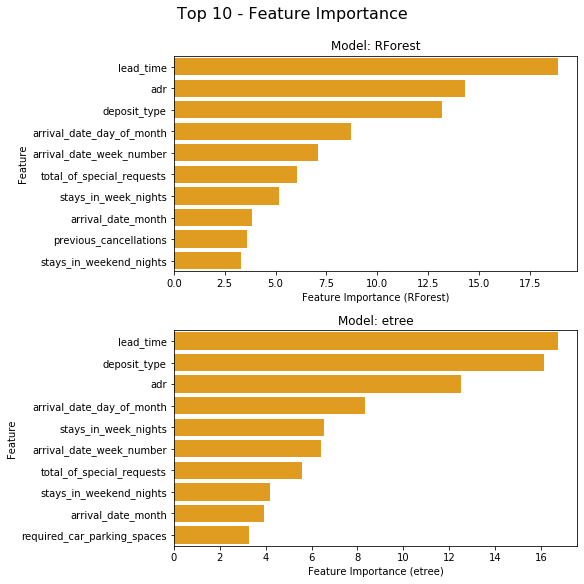

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,constrained_layout=True)
fig.suptitle('Top 10 - Feature Importance', fontsize=16)
fig.set_figheight(8)
fig.set_figwidth(8)

# Best model 1

ax1.set_title('Model: {}'.format(best_1['name']))
sns.set_color_codes("pastel")
sns.barplot(x="Feature Importance ({})".format(best_1['name']), y="Feature", data=best_1_top10, color="orange", ax=ax1)


# Best model 2

ax2.set_title('Model: {}'.format(best_2['name']))
sns.set_color_codes("pastel")
sns.barplot(x="Feature Importance ({})".format(best_2['name']), y="Feature", data=best_2_top10, color="orange", ax=ax2)

plt.savefig(path + 'Figures/booking_feature_importance.png')
plt.show()

### Confusion Matrix

In [53]:
# Library to work with Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

- Collecting predictive values to use with **Confusion Matrix** of the **two best models**.

In [54]:
best_1_pred = best_1['pred']
best_2_pred = best_2['pred']

- Plotting the **confusion matrix** data.

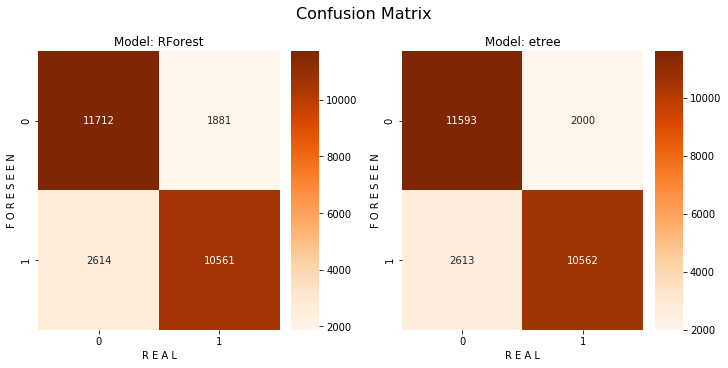

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,constrained_layout=True)
fig.suptitle('Confusion Matrix', fontsize=16)
fig.set_figheight(5)
fig.set_figwidth(10)

# Best 1 plot

sns.heatmap(confusion_matrix(y_test, best_1_pred), cmap='Oranges', annot=True, fmt='2.0f', ax=ax1)
ax1.set_title('Model: {}'.format(best_1['name']))
ax1.set_ylabel('F O R E S E E N')
ax1.set_xlabel('R E A L')

# Best 2 plot

sns.heatmap(confusion_matrix(y_test, best_2_pred), cmap='Oranges', annot=True, fmt='2.0f', ax=ax2)
ax2.set_title('Model: {}'.format(best_2['name']))
ax2.set_ylabel('F O R E S E E N')
ax2.set_xlabel('R E A L')

plt.savefig(path + 'Figures/booking_confusion_matrix.png')
plt.show()

### Evaluating Confusion Matrix

- Calculating **precision**, **recall**, **accuracy** and **F1 scores** of the **two best models**.

In [56]:
# Precision

p_score_1 = precision_score(y_test,best_1_pred)
p_score_2 = precision_score(y_test,best_2_pred)

# Recall

r_score_1 = recall_score(y_test,best_1_pred)
r_score_2 = recall_score(y_test,best_2_pred)

# Accuracy

a_score_1 = accuracy_score(y_test,best_1_pred)
a_score_2 = accuracy_score(y_test,best_2_pred)

# F1 Score

f_score_1 = f1_score(y_test,best_1_pred)
f_score_2 = f1_score(y_test,best_2_pred)

- Creating dataframe with the **precision**, **recall**, **accuracy** and **F1 scores** of the **two best models**.

In [57]:
score_results = {'model':['{}'.format(best_1['name']), '{}'.format(best_2['name'])],
                     'precision':[p_score_1, p_score_2],
                     'recall': [r_score_1, r_score_2],
                     'accuracy': [a_score_1, a_score_2],
                     'f1_score': [f_score_1, f_score_2]}

In [58]:
confusion_matrix = pd.DataFrame(score_results)

- Showing **precision**, **recall**, **accuracy** and **F1 scores** results of the **two best models**.

In [59]:
confusion_matrix

model  precision    recall  accuracy  f1_score
0  RForest   0.848819  0.801594  0.832076  0.824531
1    etree   0.840790  0.801670  0.827667  0.820764